In [5]:
#support vector machine(svm)
import numpy as np
from sklearn.svm import SVR

x=np.array([[1],[2],[3],[4],[5]])
y=np.array([[30000],[35000],[40000],[45000],[50000]])

model=SVR(kernel='rbf',C=1000,epsilon=500)
model.fit(x,y)

print(model.predict([[6]]))

[40741.52675367]


C:\Users\atmiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
#Classifier
#Logistic Regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

data={
    'mark':[25,35,40,55,65,75,90],
    'result':['Fail','Fail','Pass','Pass','Pass','Pass','Pass']
}
df=pd.DataFrame(data)
df['result']=df['result'].map({'Fail':0,'Pass':1})

x=df[['mark']]
y=df[['result']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

model=LogisticRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print('confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('\n classification report:\n',classification_report(y_test,y_pred))

confusion matrix:
 [[1 0]
 [0 2]]

 classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



C:\Users\atmiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
#Classifier
#Naive bayes algorithm

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

data={
    'Message':[
        "win money now",
        "lowest price offer",
        "hello friend how are you",
        "lets meet tommorrow",
        "congratulatios, you won a lottery",
        "reminder for the meetting at 5 pm"
    ],
    'Label':['spam','spam','not spam','not spam','spam','not spam']
}
df=pd.DataFrame(data)
df['Label']=df['Label'].map({'not spam':0,'spam':1})
x=df['Message']
y=df['Label']

vectorizer=CountVectorizer()
x_features=vectorizer.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_features,y,test_size=0.3,random_state=1)

model=MultinomialNB()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

new_emails=["free offer just for you","hi, are we still on for today?"]
new_features=vectorizer.transform(new_emails)
predictions=model.predict(new_features)

for emails,p in zip(new_emails,predictions):
    print(f"Emails:'{emails}'->{'spam' if  p==1 else 'not spam'}")

Emails:'free offer just for you'->spam
Emails:'hi, are we still on for today?'->not spam


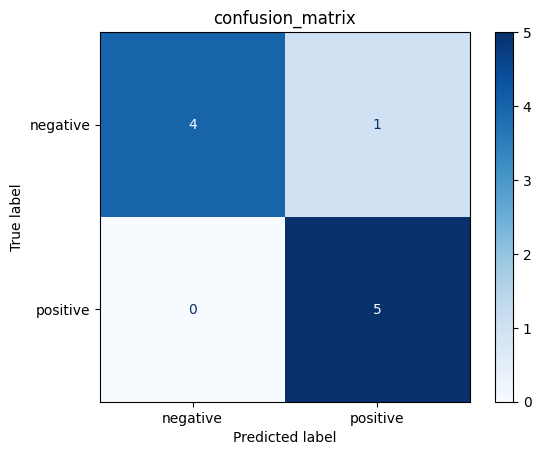

In [10]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

y_true=[0,0,1,1,0,1,0,1,1,0]
y_pred=[0,1,1,1,0,1,0,1,1,0]

cm=confusion_matrix(y_true,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["negative","positive"])
disp.plot(cmap=plt.cm.Blues,values_format='d')

plt.title("confusion_matrix")
plt.show()